# Corona case timeseries
Based on corona_timeseries.py

This script collects the latest corona case numbers from Johns Hopkins
University and displays them graphically including a fit for exponential growth.

In [1]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
from corona_timeseries import *

In [3]:
def get_data_jhu(which_data='confirmed cases'):
    """
    Fetches Corona data from Johns Hopkins University
    Returns pd.DataFrame (index = date, column = country)

    Country specific modifications based on the UN list of countries:
    'Serbia' and 'Kosovo' are merged into 'Serbia'
    'Taiwan*' is renamed to 'Taiwan'
    'occupied Palestinian territory' is renamed to 'Palestine'
    'Gambia, The' is renamed to 'Gambia'
    'Bahamas, The' is renamed to 'Bahamas',

    :param which_data: {'confirmed cases', 'recovered','deaths'}
    :type which_data: str
    :return: pd.DataFrame (index = datetime, column = country)
    :type return: pd.DataFrame
    """
    # github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
    BASE_URL = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/' \
               r'master/csse_covid_19_data/csse_covid_19_time_series/'
    SPECIFIC_URL = {'confirmed cases': r'time_series_covid19_confirmed_global.csv',
                    'recovered': r'time_series_covid19_deaths_global.csv',
                    'deaths': r'time_series_19-covid-Deaths.csv'}

    df = pd.read_csv(BASE_URL + SPECIFIC_URL[which_data])
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.rename(columns={'Country/Region': 'Country'})

    df = df.set_index('Country')
    df = df.groupby(['Country']).sum()

    try:
        df.loc['Serbia'] = df.loc['Serbia'] + df.loc['Kosovo']
        df = df.drop(index=[
            'Kosovo',
            'Cruise Ship',
        ])
    except Exception as e1:
        print(e1)

    df = df.transpose()
    df.index = pd.to_datetime(df.index)
    df = df.asfreq('d')

    df = df.rename(columns={'Bahamas, The': 'Bahamas',
                            'Taiwan*': 'Taiwan',
                            'Gambia, The': 'Gambia',
                            'occupied Palestinian territory': 'Palestine'})

    return df

In [4]:
df = get_data_jhu(which_data='confirmed cases')

"['Cruise Ship'] not found in axis"


In [5]:
df_pop = get_population()

In [6]:
def normalize_to_population(df_to_norm, norm=1E6):
    """
    Normalizes country-specific data with regard to their population (default: per million)
    :param df_to_norm: Input DataFrame (colums = countries)
    :type df_to_norm: pandas.DataFrame
    :param norm: Normalization factor: e.g. 1E6 for per million
    :return: Normalized DataFrame
    """
    df_pop = get_population()
    normed_df = pd.DataFrame()

    for country in df_to_norm.columns:
        try:
            normed_df[country] = df_to_norm[country] / (df_pop.loc[country, 'Population'] / norm)
        except Exception as e1:
            print(e1)

    return normed_df

In [7]:
dfn = normalize_to_population(df)
dfn

'Burma'
'Cabo Verde'
'Diamond Princess'
'Kosovo'
'MS Zaandam'
'Sao Tome and Principe'
'Timor-Leste'
'West Bank and Gaza'


,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Western Sahara,Zambia,Zimbabwe
2020-01-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020734,0.000000,0.000000,0.000000
2020-01-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020734,0.000000,0.000000,0.000000
2020-01-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020734,0.000000,0.000000,0.000000
2020-01-26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.158710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020734,0.000000,0.000000,0.000000
2020-01-27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.198388,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020734,0.000000,0.000000,0.000000
2020-01-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.198388,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020734,0.000000,0.000000,0.000000
2020-01-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.238065,0.000000,...,0.000000,0.409394,0.000000,0.000000,0.000000,0.000000,0.020734,0.000000,0.000000,0.000000
2020-01-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.357098,0.000000,...,0.000000,0.409394,0.000000,0.000000,0.000000,0.000000,0.020734,0.000000,0.000000,0.000000
2020-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.357098,0.000000,...,0.000000,0.409394,0.029616,0.000000,0.000000,0.000000,0.020734,0.000000,0.000000,0.000000


In [8]:
def set_up_axes(xrotation=45, **kwargs):
    """
    Adjust the ticks on the axis, labeling, etc.
    :param kwargs:
        See below

        :Keyword Arguments:
        log (bool): yscale log
        ylabel (str): ylabel
        ylim (list): yrange = (ymin, ymax)
        xmin (datetime.date): xmin
        xmax (datetime.date): xmax
        y_tick_formatter (str): formatter for y ticks e.g. '%.f' or '%.e'
    """
    ax = plt.gca()

    if kwargs.get('log', True):
        plt.yscale('log')

    plt.ylabel(kwargs.get('ylabel'))

    if kwargs.get('ylim'):
        plt.ylim(kwargs.get('ylim')[0], kwargs.get('ylim')[1])

    plt.xlim(kwargs.get('xmin'), kwargs.get('xmax'))

    sundays = mdates.WeekdayLocator(byweekday=mdates.SU)
    everyday = mdates.DayLocator(interval=1)
    ax.xaxis.set_major_locator(sundays)
    ax.xaxis.set_minor_locator(everyday)
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    plt.tick_params(axis='y', which='minor')
    plt.xticks(rotation=xrotation)

    plt.setp(ax.get_yminorticklabels()[1::2], visible=False)
    ax.yaxis.set_major_formatter(FormatStrFormatter(kwargs.get('y_tick_formatter')))
    ax.yaxis.set_minor_formatter(FormatStrFormatter(kwargs.get('y_tick_formatter')))

    plt.grid(b=True, which='major', color='grey', linestyle='-')
    plt.grid(b=True, which='minor', color='grey', linestyle='--', linewidth=0.5)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    #plt.tight_layout()


In [9]:
def plot_timeindex_dataframe(df, countries, fit=True, colormap='tab10', num_colors=10, 
                             subplots_kwargs={}, **kwargs):
    """
    Creates scatter plot for alle df.columns in countries.
    :param df: Dataframe with index = DatetimeIndex and colums =countries
    :type df: pandas.DataFrame
    :param countries: Countries to be plotted from the dataframe
    :tpye countries: list
    :param fit: fit values or not
    :type fit: bool
    :param kwargs:
    See below

    :Keyword Arguments:
    fit_window (int): Length of the interval in days, which should be approximated
    fit_forecast (int): Length of the interval to be extrapolated in days
    fit_starting_date (datetime.date): Start of the interval, which is to be approximated, as date
    """
    fig, ax = set_up_fig(num_colors=num_colors, colormap=colormap, subplots_kwargs=subplots_kwargs)
    for country in countries:
        scatter = ax.scatter(df.index, df[country])

        if fit:
            fit_exp_growth(df[country],
                           fit_window=kwargs.get('fit_window', 7),
                           forecast=kwargs.get('fit_forecast', 14),
                           starting_date=kwargs.get('fit_starting_date', None))
            ax.plot([], [], marker='o', linestyle='-', label=None,
                    color=scatter.get_facecolors()[0])
        else:
            ax.plot([], [], marker='o', label=country, color=scatter.get_facecolors()[0])

In [10]:
%%capture
CONF_CASES_DF = get_data_jhu()
CONF_CASES_NORM_DF = normalize_to_population(CONF_CASES_DF, norm=1e6)
ACTIVE_CONF_CASES = CONF_CASES_DF - get_data_jhu('recovered')

# extract_countries_without_case()

fig, ax = set_up_fig(subplots_kwargs={'figsize': (13,7)})

In [11]:
COUNTRIES_TO_PLOT = select_sort_countries(CONF_CASES_NORM_DF, CONF_CASES_NORM_DF,
                                          countries_to_include=['France',
                                                                'United Kingdom',
                                                                'Austria',
                                                                'Germany',
                                                                'Italy',
                                                                'Spain',
                                                                'Sweden',
                                                                'Korea, South',
                                                                'Australia',
                                                                'US'],
                                          countries_to_exclude=['Iran',                                                                'Iran',
                                                                'Norway',
                                                                'Belgium',
                                                                'Sweden',
                                                                'Denmark'],
                                          threshold=10000)
COUNTRIES_TO_PLOT

['Spain',
 'Italy',
 'France',
 'Austria',
 'Germany',
 'US',
 'United Kingdom',
 'Sweden',
 'Australia',
 'Korea, South']

In [12]:
plt.rcParams["figure.figsize"] = (20,15)

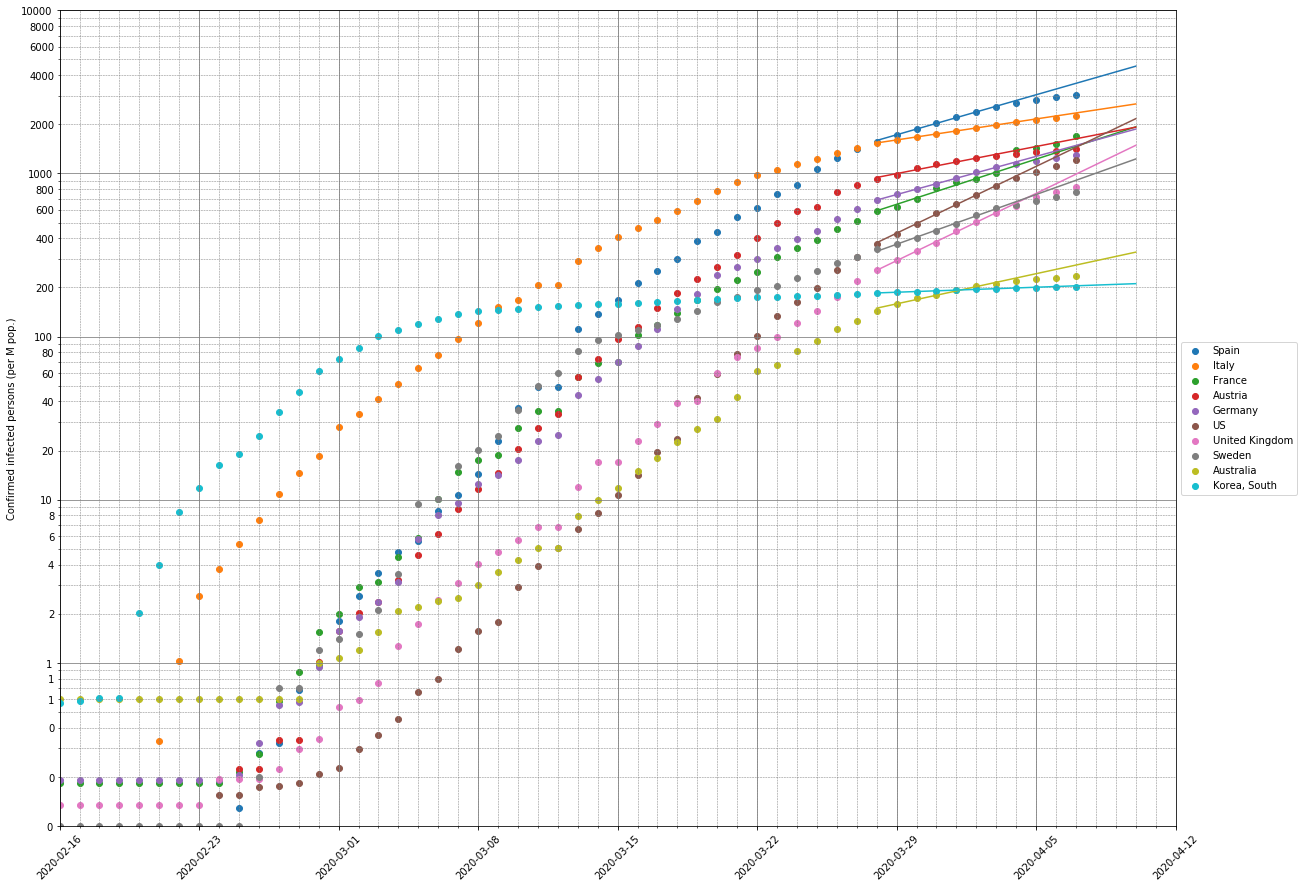

In [13]:
WEEKS_TO_FORECAST = 1
SUNDAY_AFTER_NEXT_SUNDAY = date.today() + timedelta(days=(WEEKS_TO_FORECAST*7)-1 - date.today().weekday())

plot_timeindex_dataframe(CONF_CASES_NORM_DF, COUNTRIES_TO_PLOT,
                         fit=True,
                         fit_window=7,
                         fit_forecast=WEEKS_TO_FORECAST*7,
                         fit_starting_date=date(2020, 3, 28)
                         )

set_up_axes(log=True,
            ylim=(1E-1, 10000),
            xmin=date(2020, 2, 16),
            xmax=SUNDAY_AFTER_NEXT_SUNDAY,
            ylabel='Confirmed infected persons (per M pop.)',
            y_tick_formatter='%.f')
plt.savefig('output.png')

In [14]:
# New cases per total cases
df = CONF_CASES_DF.copy()
NEWCONFbyCONF = df.diff()/df
    

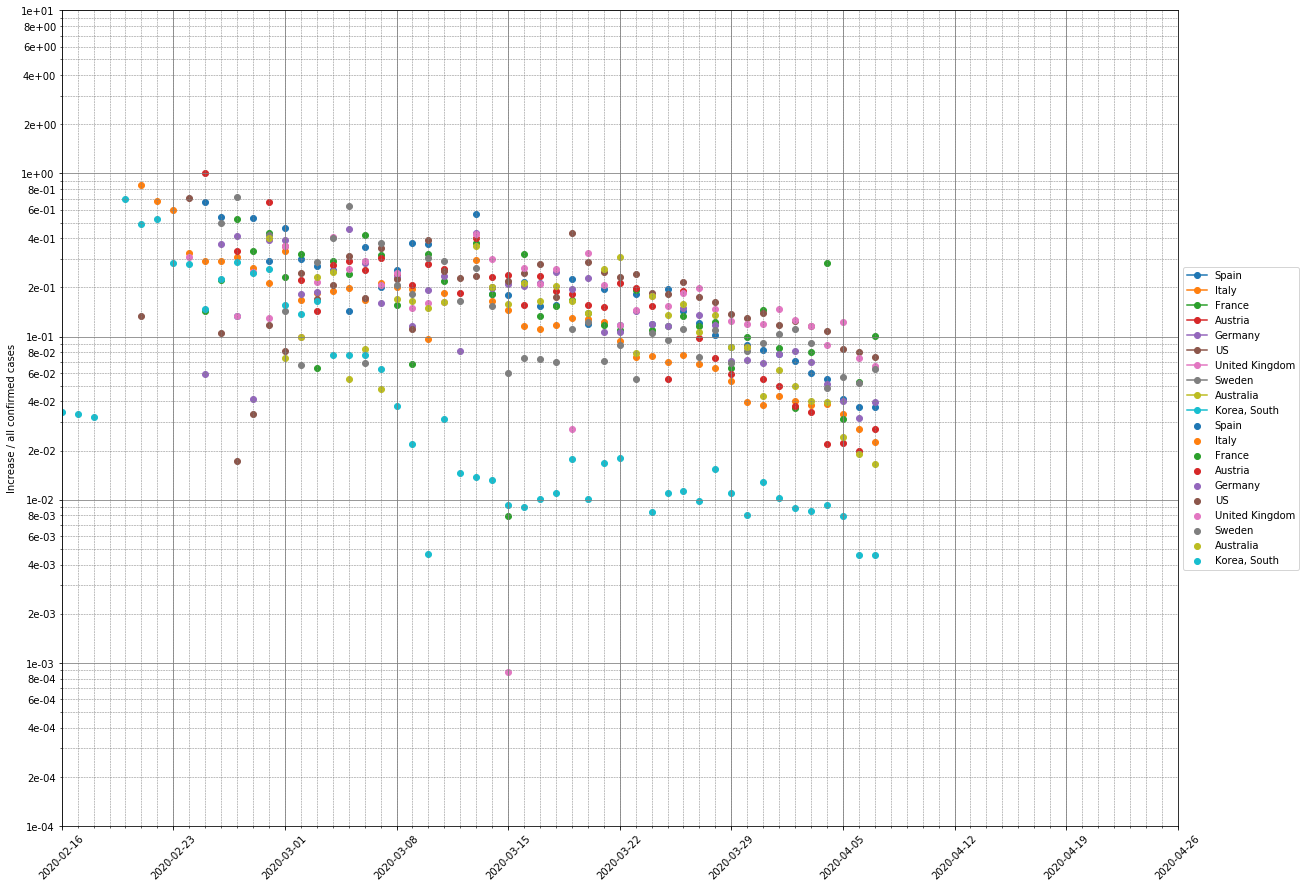

In [15]:
plot_timeindex_dataframe(NEWCONFbyCONF, COUNTRIES_TO_PLOT,
                         fit=False,
                         )

WEEKS_TO_FORECAST = 3
SUNDAY_AFTER_NEXT_SUNDAY = date.today() + timedelta(days=(WEEKS_TO_FORECAST*7)-1 - date.today().weekday())

set_up_axes(log=True,
            ylim=(1e-4, 10),
            xmin=date(2020, 2, 16),
            xmax=SUNDAY_AFTER_NEXT_SUNDAY,
            ylabel='Increase / all confirmed cases',
            y_tick_formatter='%.e')
plt.savefig('output1.png')